In [2]:
import pandas as pd
import numpy as np


In [15]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../notebooks')))

In [30]:
df_store=pd.read_csv("../data\store.csv")
df_train=pd.read_csv("../data\\train.csv")
df_test=pd.read_csv("../data\\test.csv")




C:\Users\ende\AppData\Local\Temp\ipykernel_6004\2869953929.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv("../data\\train.csv")


In [31]:
df_store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [34]:
df_test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [35]:
df_train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [55]:
df_train['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [39]:
dflist=[df_train,df_test,df_store]
for df in dflist:
    df.info()
    print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 62.1+ MB
(1017209, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 

In [43]:
# % of values missing in each column 
values_list = list() 
cols_list = list() 
for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())*100 
    cols_list.append(col) 
    values_list.append(pct_missing) 
    pct_missing_df = pd.DataFrame() 
    pct_missing_df['col'] = cols_list 
    pct_missing_df['pct_missing'] = values_list

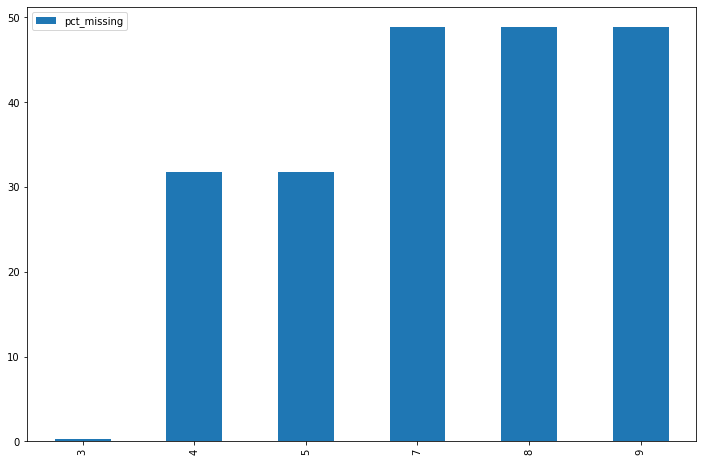

In [44]:
from matplotlib import pyplot as plt
pct_missing_df.loc[pct_missing_df.pct_missing > 0].plot(kind='bar', figsize=(12,8))
plt.show()

In [40]:
for i, dfr in enumerate(dflist):
    print(dflist[i].isnull().sum().sum())



0
11
2343


In [45]:
df_store.dropna(inplace=True)

In [66]:
def to_int(x):
    return int(x)
# use function to convert floats to int

#df_store['CompetitionOpenSinceYear'] = df_store['CompetitionOpenSinceYear'].apply(to_int)
#df_store['CompetitionOpenSinceMonth'] = df_store['CompetitionOpenSinceMonth'].apply(to_int)
df_store['Promo2SinceWeek'] = df_store['Promo2SinceWeek'].apply(to_int)
df_store['Promo2SinceYear'] = df_store['Promo2SinceYear'].apply(to_int)

df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
10,11,a,c,960.0,11,2011,1,1,2012,"Jan,Apr,Jul,Oct"
13,14,a,a,1300.0,3,2014,1,40,2011,"Jan,Apr,Jul,Oct"
14,15,d,c,4110.0,3,2010,1,14,2011,"Jan,Apr,Jul,Oct"


In [64]:
import datetime

d = "2010-W13"
r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
print(r)

2010-03-29 00:00:00


In [65]:
import datetime

def weeknum_to_dates(weeknum):
    return [datetime.datetime.strptime("2021-W"+ str(weeknum) + str(x), "%Y-W%W-%w").strftime('%d.%m.%Y') for x in range(-5,0)]

weeknum_to_dates(37)

['17.09.2021', '16.09.2021', '15.09.2021', '14.09.2021', '13.09.2021']

In [67]:
import datetime
for weeknum in df_store['Promo2SinceWeek']:

    def weeknum_to_dates(weeknum):
        return [datetime.datetime.strptime(("df_store["Promo2SinceYear"]-W")+ str(weeknum) + str(x), "%Y-W%W-%w").strftime('%d.%m.%Y') for x in range(-5,0)]




SyntaxError: invalid syntax (3864594421.py, line 5)

In [48]:
import datetime

In [56]:
df_store['DATE'] = pd.to_datetime(df_store[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']]).dt.to_period('Y','M')

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [58]:
df_store['DATE'] =  pd.to_datetime(df_store[['CompetitionOpenSinceYear','CompetitionOpenSinceMonth']],format='%Y%m%')
#df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [51]:
df_store['Date_comptition'] = df_store.apply(lambda x: datetime.datetime.strptime("​{0} {1}​".format(x['CompetitionOpenSinceYear'],x['CompetitionOpenSinceMonth']), "%Y %M"),axis=1)

ValueError: time data '\u200b2007 11\u200b' does not match format '%Y %M'